In [47]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as pyplot
import numpy as np

#**Assignment 2: Convolutional Neural Network**

##**Data**

Data: CIFAR-10

CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 **color images** containing one of 10 object classes, with 6000 images per class.

Labels are as follows:

airplane (0), automobile (1), bird (2), cat (3), deer (4), dog (5), frog (6), horse (7), ship (8), truck (9)

Source: https://www.kaggle.com/c/cifar-10

### Q1. This dataset has been included in **keras.datasets.cifar10**. Please load the dataset and print the shape of training and testing sets.

In [48]:
# load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
# print the shape of training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (50000, 32, 32, 3)
Testing set shape: (10000, 32, 32, 3)


### Q2. Convert the target labels (y) into the one-hot format and show the value (y) for the first instance of the training dataset.

In [49]:
# convert target labels to one-hot format
y_train_one_hot = keras.utils.to_categorical(y_train, num_classes=10)
y_test_one_hot = keras.utils.to_categorical(y_test, num_classes=10)
# show the value for the first instance of the training dataset
print("First instance of training labels (one-hot):", y_train_one_hot[0])

First instance of training labels (one-hot): [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### Q3. Create a validation dataset using the first 5,000 instances in the training dataset. Also, divide all input features (X values) in the train/test/validation sets by 255.0. Please show the y value for the first instance of the validation dataset.

In [50]:
# create validation dataset
X_val = X_train[:5000] / 255.0
y_val = y_train_one_hot[:5000]
X_train = X_train[5000:] / 255.0
y_train_one_hot = y_train_one_hot[5000:]
X_test = X_test / 255.0
# show the y value for the first instance of the validation dataset
print("First instance of validation labels (one-hot):", y_val[0])

First instance of validation labels (one-hot): [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## **Model**

### Q4. Create a convolutional neural network with 32 kernels of size 3 by 3 in the first layer and 64 kernels of size 3 by 3 in the second layer. We need a max pooling layer wth the size of 2 after each convolution layer. After flattening the feature maps add a fully-connected layer with 128 nodes for the final prediction. Please print the model summary.

### Please note that the input images are color images with the shape of **32 * 32 * 3**. Here 3 shows RGB.

In [51]:
# create the model (add name=)
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3), name='conv1'),
    keras.layers.MaxPooling2D((2, 2), name='pooling1'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2'),
    keras.layers.MaxPooling2D((2, 2), name='pooling2'),
    keras.layers.Flatten(name='flat'),
    keras.layers.Dense(128, activation='relu', name='fully-connected'),
    keras.layers.Dense(10, activation='softmax', name='output')
])

model.summary()

# run one forward pass to initialize tensor shapes
dummy_input = tf.zeros((1, 32, 32, 3))
model(dummy_input)

# print keras tensors (instead of activations)
for layer in model.layers:
    print(layer.output)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling1 (MaxPooling2D)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling2 (MaxPooling2D)         │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flat (Flatten)                  │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fully-connected (Dense)         │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

<KerasTensor shape=(None, 32, 32, 32), dtype=float32, sparse=False, ragged=False, name=keras_tensor_80>
<KerasTensor shape=(None, 16, 16, 32), dtype=float32, sparse=False, ragged=False, name=keras_tensor_81>
<KerasTensor shape=(None, 16, 16, 64), dtype=float32, sparse=False, ragged=False, name=keras_tensor_82>
<KerasTensor shape=(None, 8, 8, 64), dtype=float32, sparse=False, ragged=False, name=keras_tensor_83>
<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, ragged=False, name=keras_tensor_84>
<KerasTensor shape=(None, 128), dtype=float32, sparse=False, ragged=False, name=keras_tensor_85>
<KerasTensor shape=(None, 10), dtype=float32, sparse=False, ragged=False, name=keras_tensor_86>


### Q5. Create an Adam optimizer with a learning rate of 0.001, compile the model, and fit it on the training and validation datasets. Use the following hyperparameters: **batch_size=512, epochs=5**.

### *Hint*: Adam optimizer can be imported by **keras.optimizers.Adam(learning_rate=0.001)**

In [52]:
# create Adam optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.001)
# compile the model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train_one_hot,
          batch_size=512,
          epochs=5,
          validation_data=(X_val, y_val))

Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.3794 - loss: 1.7417 - val_accuracy: 0.4774 - val_loss: 1.4705
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.5134 - loss: 1.3816 - val_accuracy: 0.5358 - val_loss: 1.3186
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.5643 - loss: 1.2521 - val_accuracy: 0.5864 - val_loss: 1.1957
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.5970 - loss: 1.1549 - val_accuracy: 0.5976 - val_loss: 1.1405
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.6185 - loss: 1.0968 - val_accuracy: 0.6178 - val_loss: 1.0825


## **Performance**

### Q6. Evaluate your model.

In [53]:
# evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
print("Test accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6174 - loss: 1.0889
Test accuracy: 0.6173999905586243


## **Post-analysis**

### Q7. Print the name of layers.

#### Note: You may choose any name you like for your layers.

In [54]:
# print the name of layers
for layer in model.layers:
    print(layer.name)

conv1
pooling1
conv2
pooling2
flat
fully-connected
output


### Q8. Print the output of layers.

In [59]:
model(tf.zeros((1,32,32,3)))

def pretty_keras_tensors(model):
    items = []
    for layer in model.layers:
        if not hasattr(layer, "output"):
            continue
        t = layer.output
        shape_str = "(" + ", ".join("None" if d is None else str(d) for d in t.shape) + ")"
        dtype_str = getattr(t.dtype, "name", str(t.dtype))
        items.append(f"<KerasTensor: shape={shape_str} dtype={dtype_str} (created by layer '{layer.name}')>")
    return "[{}]".format(",\n ".join(items))

print(pretty_keras_tensors(model))

[<KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'conv1')>,
 <KerasTensor: shape=(None, 16, 16, 32) dtype=float32 (created by layer 'pooling1')>,
 <KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'conv2')>,
 <KerasTensor: shape=(None, 8, 8, 64) dtype=float32 (created by layer 'pooling2')>,
 <KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'flat')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'fully-connected')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'output')>]


### Q9. Print the output shape of feature maps in the convolution layers as well as the pooling layers for the fifth instance in your test dataset.

In [63]:
dummy_input = tf.zeros((1, 32, 32, 3))
model(dummy_input)  # This defines the input shapes

# Step 2: Get layer outputs (focus on conv and pooling layers)
# Filter only conv and pooling layers for feature maps
conv_pool_layers = [layer for layer in model.layers if 'conv' in layer.name.lower() or 'pool' in layer.name.lower()]
layer_outputs = [layer.output for layer in conv_pool_layers]  # Only these for feature maps

# Step 3: Create activation model (use layers[0].input for stable input)
activation_model = keras.Model(inputs=model.layers[0].input, outputs=layer_outputs)

# Step 4: Get activations for the fifth test instance
activations = activation_model.predict(X_test[4:5])  # Shape: (1, your_input_shape)

# Step 5: Print the output shape of each conv/pooling layer
for i, activation in enumerate(activations):
    layer_name = conv_pool_layers[i].name
    print(f"Output shape of layer '{layer_name}': {activation.shape}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Output shape of layer 'conv1': (1, 32, 32, 32)
Output shape of layer 'pooling1': (1, 16, 16, 32)
Output shape of layer 'conv2': (1, 16, 16, 64)
Output shape of layer 'pooling2': (1, 8, 8, 64)


The frog image below should be your fifth testing instance (index=4).

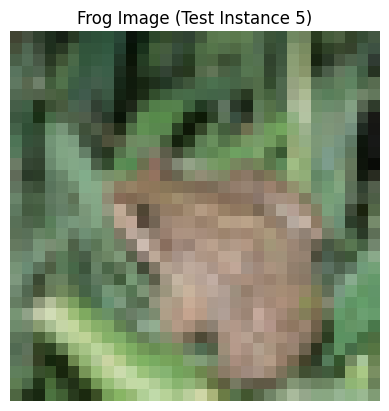

In [57]:
# display the fifth test instance
pyplot.imshow(X_test[4])
pyplot.title("Frog Image (Test Instance 5)")
pyplot.axis('off')
pyplot.show()

### Q10. Draw 16 feature maps for each convolution and pooling layer.

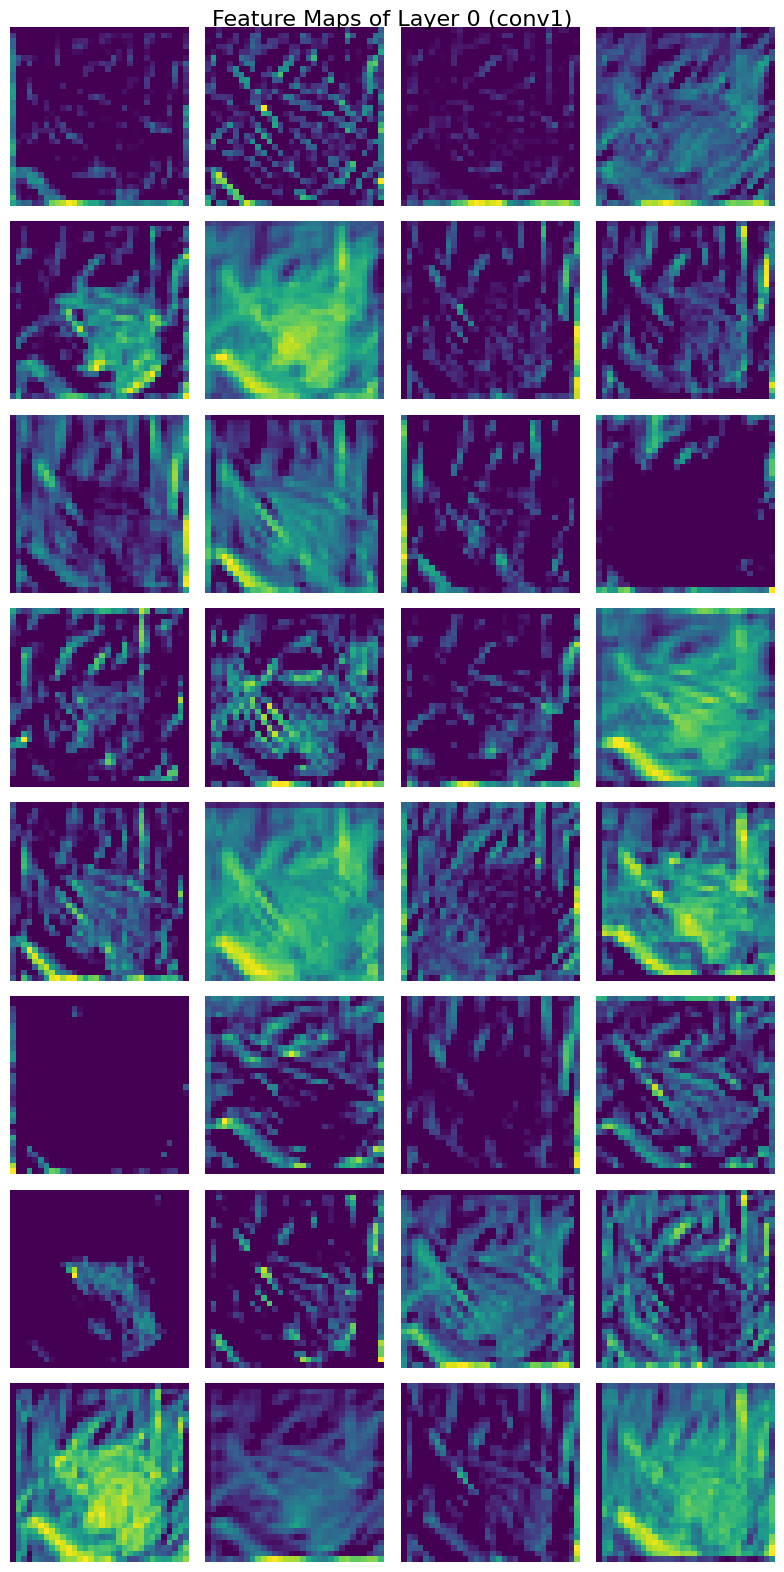

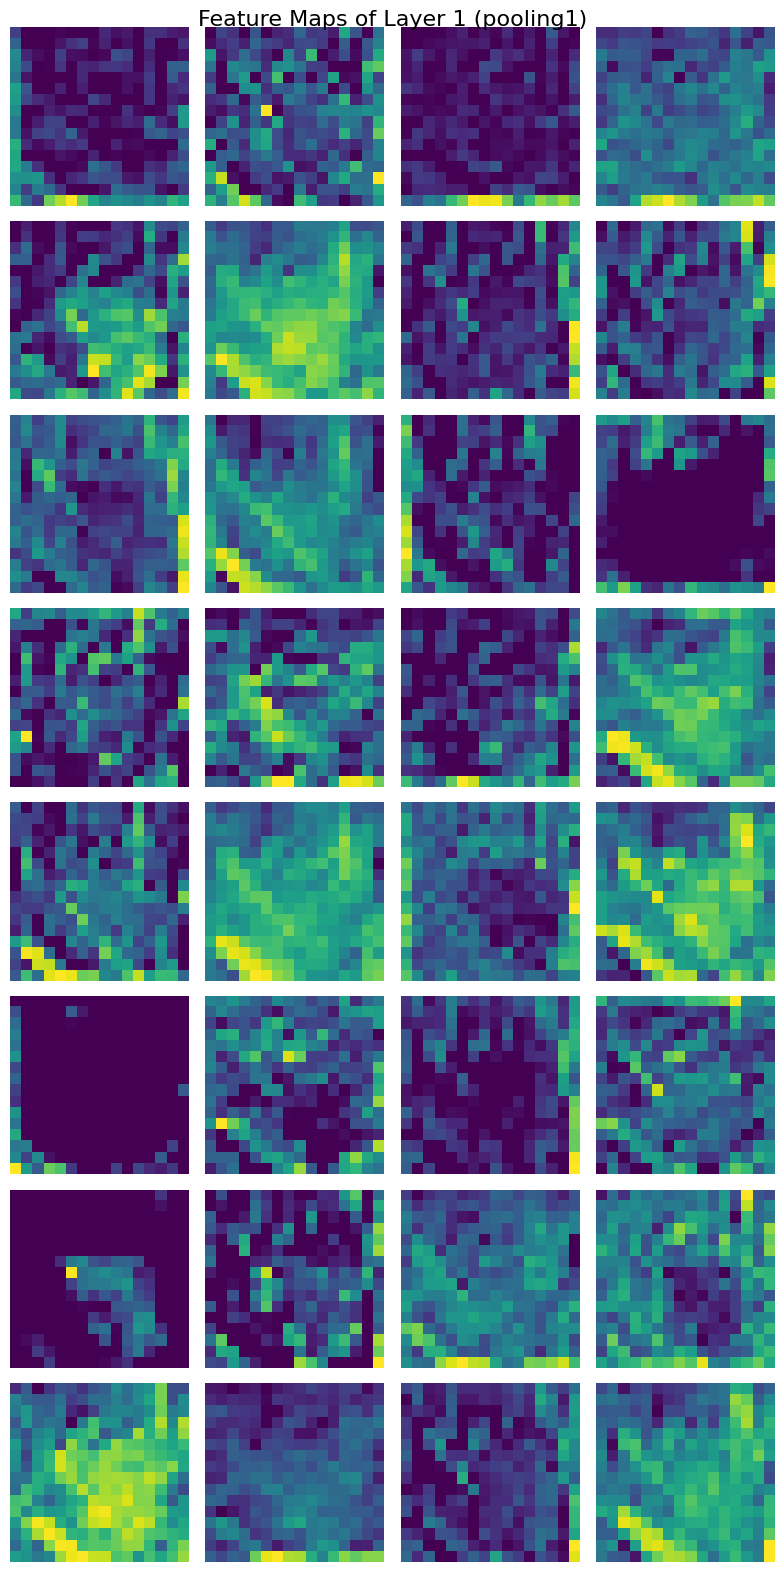

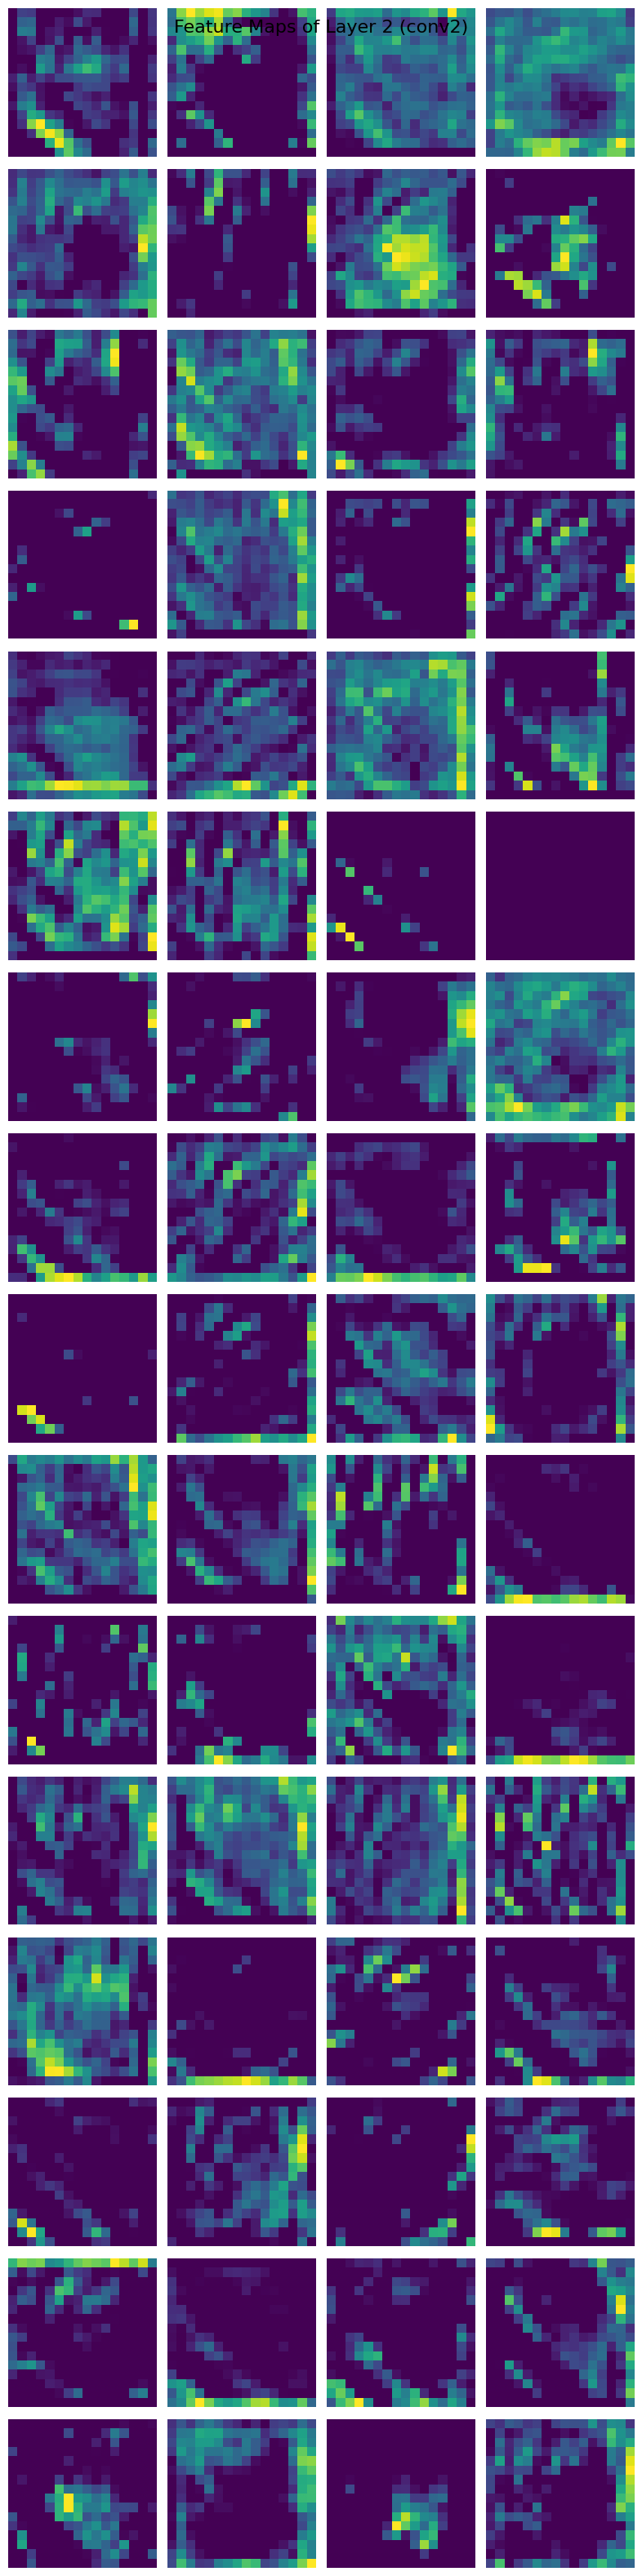

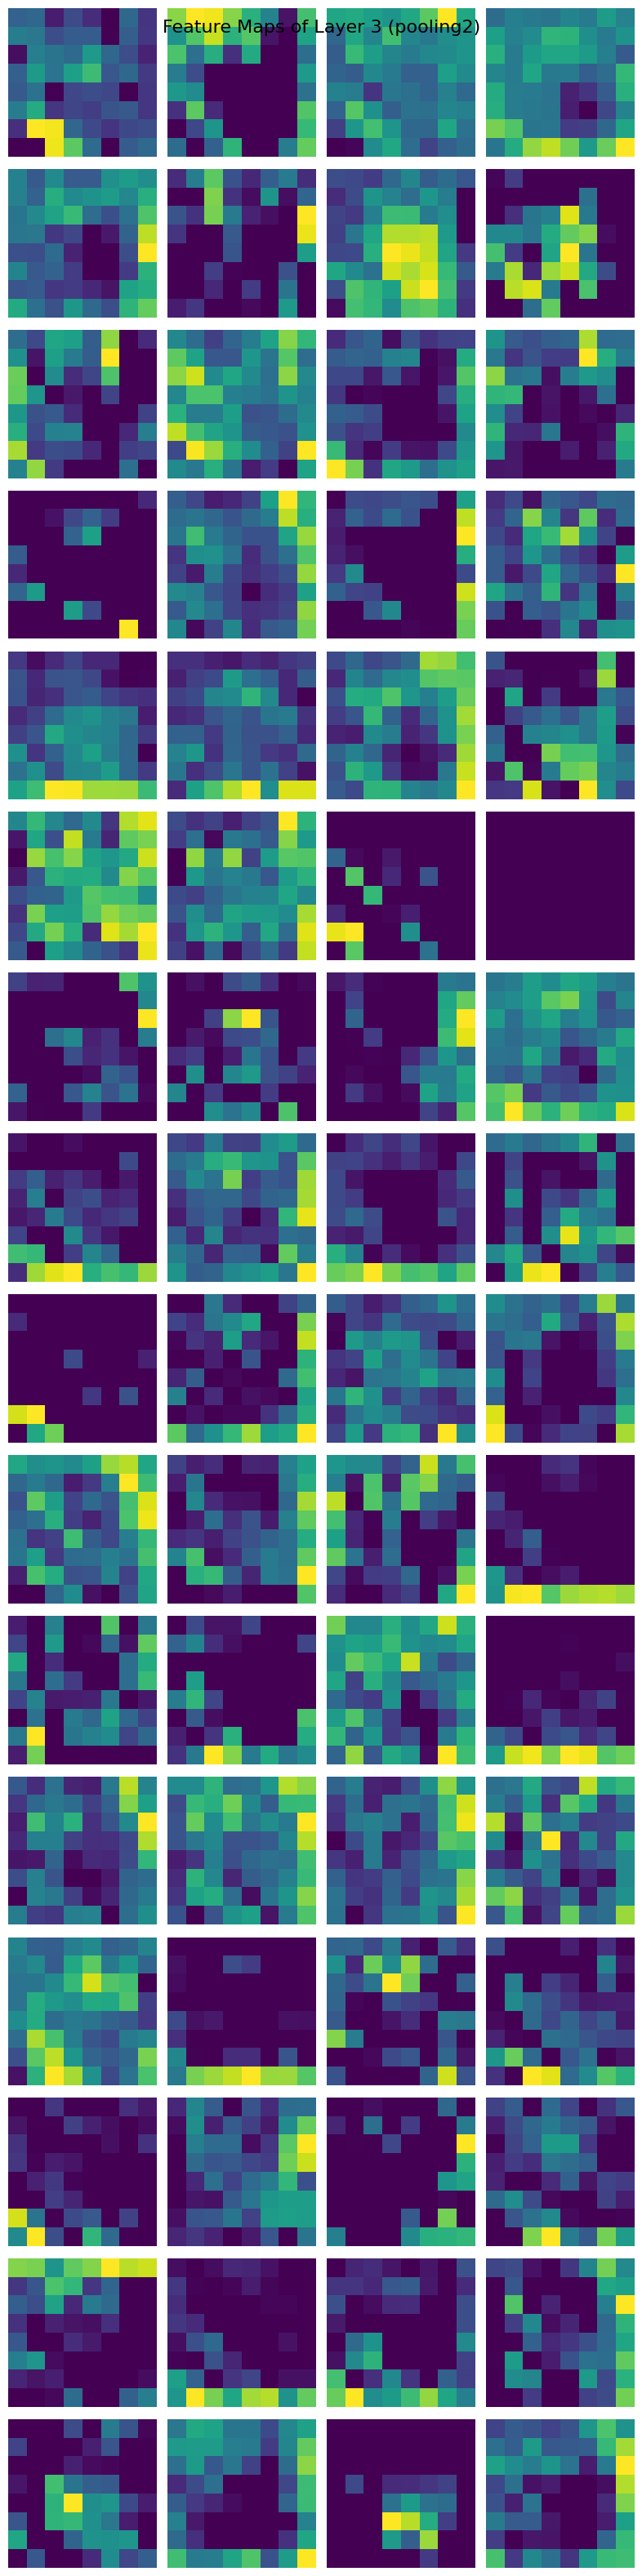

In [66]:
# function to plot feature maps
def plot_feature_maps(activations, layer_names):
    for layer_index, activation in enumerate(activations):
        if len(activation.shape) == 4:  # Check if it's a convolutional or pooling layer
            num_filters = activation.shape[-1]
            size = activation.shape[1]
            n_cols = 4
            n_rows = num_filters // n_cols + (num_filters % n_cols > 0)
            fig, axes = pyplot.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))
            fig.suptitle(f'Feature Maps of Layer {layer_index} ({layer_names[layer_index]})', fontsize=16)
            for i in range(num_filters):
                row = i // n_cols
                col = i % n_cols
                ax = axes[row, col] if n_rows > 1 else axes[col]
                ax.imshow(activation[0, :, :, i], cmap='viridis')
                ax.axis('off')
            pyplot.tight_layout()
            pyplot.show()
# plot feature maps
layer_names = [layer.name for layer in model.layers]
plot_feature_maps(activations, layer_names)
